In [1]:
# Rachel Buchleiter 
# Assignment 3
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [5]:
# Q1 - Diabetes Set
# a. Find all patients with Diabetes using the codes above by listing their patient IDs 

df = pd.read_csv('DW3_set_exercise.csv')

# Filter rows with Diagnosis Code of E08, E09, E10, E11, or E13
diabetes_df = df[df['Diagnosis Code'].isin(['E08', 'E09', 'E10', 'E11', 'E13'])]

# Group by Patient ID and list patients
patients_diabetes = diabetes_df.groupby('Patient ID').size().reset_index(name='Count')

# Print the result
print(patients_diabetes)
                           

      Patient ID  Count
0       100159.0      1
1       100267.0      1
2       102075.0      1
3       104363.0      1
4       108234.0      1
...          ...    ...
4897   7774595.0      1
4898   7774981.0      1
4899   7776158.0      1
4900   7777179.0      1
4901   7777623.0      1

[4902 rows x 2 columns]


In [6]:
# b. Find the cardinality of the Diabetes set
cardinality = patients_diabetes['Patient ID'].nunique()
print("Cardinality of patients with diabetes", cardinality)

Cardinality of patients with diabetes 4902


In [7]:
# Q2 - COVID Set
# a. Find all patients with COVID using the codes above by listing their patient IDs 

# df = pd.read_csv('DW3_set_exercise.csv')

# Filter rows with Diagnosis Code of U07.1, J12.82
covid_df = df[df['Diagnosis Code'].isin(['U07.1', 'J12.82'])]

# Group by Patient ID and list patients
patients_covid = covid_df.groupby('Patient ID').size().reset_index(name='Count')

# Print the result
print(patients_covid)

      Patient ID  Count
0       101663.0      1
1       102327.0      1
2       103554.0      1
3       108216.0      1
4       108800.0      1
...          ...    ...
1992   7769037.0      1
1993   7770393.0      1
1994   7771957.0      1
1995   7772199.0      1
1996   7777718.0      1

[1997 rows x 2 columns]


In [8]:
# b. Find the cardinality of the COVID set
cardinality = patients_covid['Patient ID'].nunique()
print("Cardinality of patients with COVID", cardinality)

Cardinality of patients with COVID 1997


In [10]:
# Q3 - Intersection set
# a. Find all patients with Diabetes AND COVID using the codes above by listing their patient IDs
intersection_set = pd.merge(patients_diabetes, patients_covid, on='Patient ID', how='inner')
# print list
print(intersection_set)

     Patient ID  Count_x  Count_y
0      138575.0        1        1
1      175474.0        1        1
2      222248.0        1        1
3      227866.0        1        1
4      266223.0        1        1
..          ...      ...      ...
160   7588327.0        1        1
161   7609020.0        1        1
162   7631360.0        1        1
163   7635276.0        1        1
164   7695977.0        1        1

[165 rows x 3 columns]


In [11]:
# b. Find the cardinality of the intersection set
cardinality = intersection_set['Patient ID'].nunique()
print("Cardinality of patients with Diabetes AND COVID", cardinality)

Cardinality of patients with Diabetes AND COVID 165


In [13]:
# Q4 Union Set
# a. Find all patients with Diabetes or COVID using the codes above by listing their patient IDs
union_set = pd.concat([patients_diabetes, patients_covid]).drop_duplicates(subset='Patient ID')
# print list
print(union_set)


      Patient ID  Count
0       100159.0      1
1       100267.0      1
2       102075.0      1
3       104363.0      1
4       108234.0      1
...          ...    ...
1992   7769037.0      1
1993   7770393.0      1
1994   7771957.0      1
1995   7772199.0      1
1996   7777718.0      1

[6734 rows x 2 columns]


In [14]:
# b. Find the cardinality of the union set
cardinality = union_set['Patient ID'].nunique()
print("Cardinality of patients with Diabetes OR COVID", cardinality)

Cardinality of patients with Diabetes OR COVID 6734


In [68]:
# Q5 Draw a Venn diagram showing the Diabetes, COVID, Intersection and Union sets.
import matplotlib.pyplot as plt
import matplotlib_venn

from matplotlib_venn import venn2


In [70]:
# Count of patients in each set
diabetes_count = 4902
covid_count = 1997
intersection_count = 165
union_count = 6734

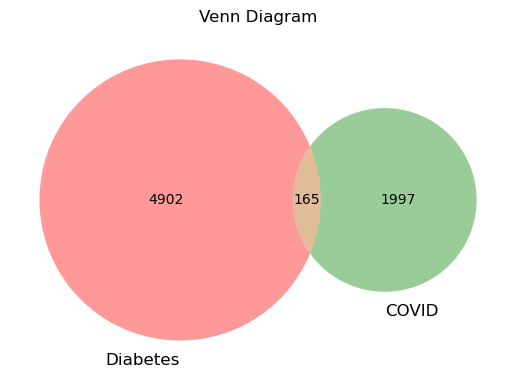

In [71]:
# Draw Venn diagram
venn2(subsets=(diabetes_count, covid_count, intersection_count),
      set_labels=('Diabetes', 'COVID'))

# Show the plot
plt.title('Venn Diagram')
plt.show()


In [73]:
# Q6 Diabetes only after COVID set
# diabetes list
diabetes_df
# COVID list
covid_df

result_df= diabetes_df.merge(covid_df, on='Patient ID', how='inner')
result_df=result_df[result_df['Date_x']> result_df['Date_y']]

In [76]:
# Unique patient ID
# unique_patients = result_df['Patient_ID'].unique()
unique_patients = result_df.groupby('Patient ID').size().reset_index(name='Count')

In [77]:
# part a
print(unique_patients)

    Patient ID  Count
0     138575.0      1
1     175474.0      1
2     222248.0      1
3     227866.0      1
4     482256.0      1
..         ...    ...
65   7542154.0      1
66   7588327.0      1
67   7609020.0      1
68   7631360.0      1
69   7635276.0      1

[70 rows x 2 columns]


In [79]:
# part b - Find the cardinality
cardinality = unique_patients['Patient ID'].nunique()
print(cardinality)

70


In [83]:
# part c - Provide a count breakdown for each of the diabetes codes listed above occurring only after COVID
diagnosis_count = result_df.groupby('Diagnosis Code_x').size().reset_index(name='Count')

# Print the count breakdown
print("Count breakdown by Diagnosis Code:")
print(diagnosis_count)


Count breakdown by Diagnosis Code:
  Diagnosis Code_x  Count
0              E08     13
1              E09      8
2              E10     16
3              E11     17
4              E13     16


SyntaxError: invalid syntax (884143407.py, line 1)